<a href="https://colab.research.google.com/github/Animesh-sudo/BitPredict/blob/main/Time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with TensorFlow + Milestone Project: BitPredict 💰📈

Let's write some TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.

⚠ **Note:** This is not financial advice.

## Get Data

We are going to be using the historical price data of Bitcoin to try and predict the future of the Bitcoin, we downloded the data from here: https://www.coindesk.com/price/bitcoin/

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-05 06:45:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-09-05 06:45:37 (19.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data with panads

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date coloumn and tell pandas coloumn 1 is datetime
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [5]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can be thousands to tens of thousands to millions)

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin from: 1 Oct 2013 to 18 May 2021')

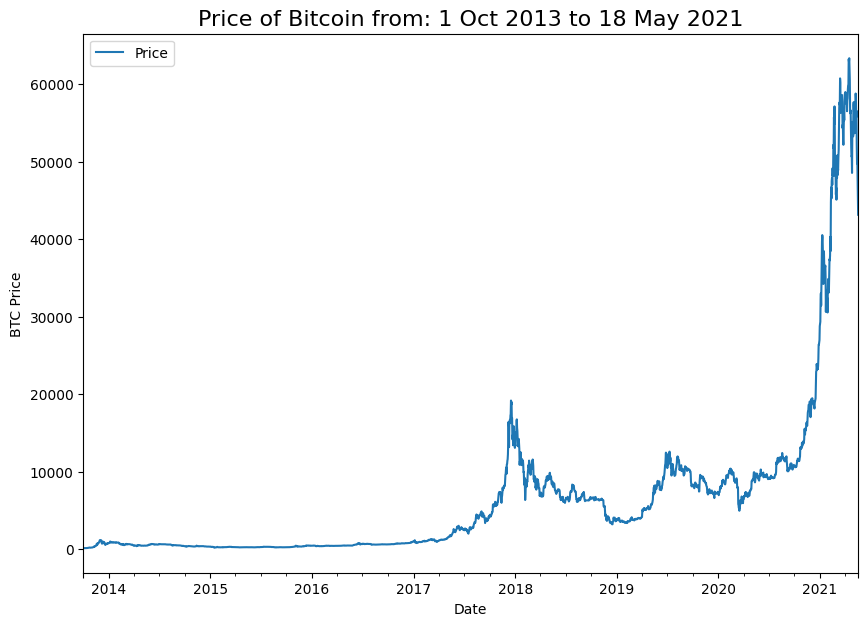

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from: 1 Oct 2013 to 18 May 2021", fontsize=16)

## Importing time series data with Python's CSV module

In [8]:
# Importing and formatting historical data with python

import csv
from datetime import datetime

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of coloumn titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
    btc_price.append(float(line[2])) # get the closing price as float

# view first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

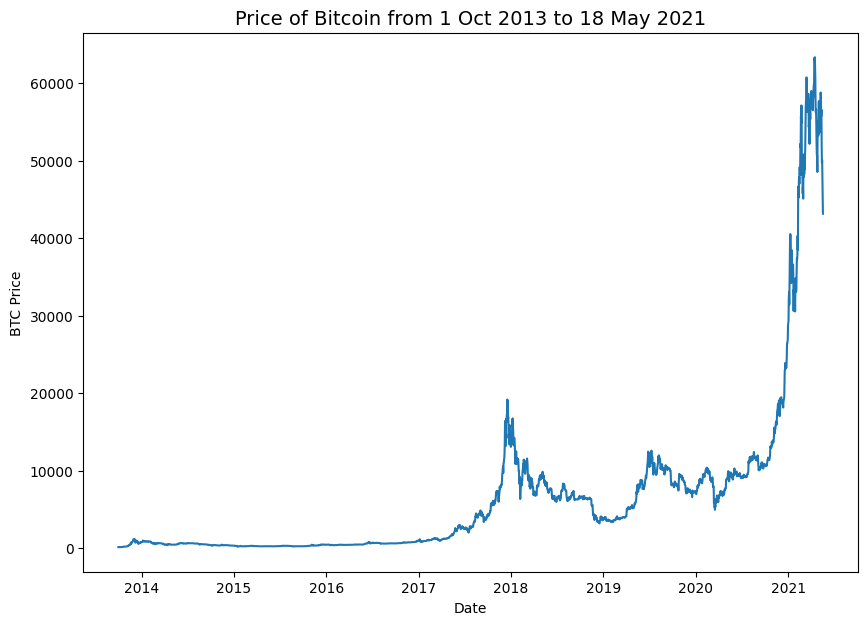

In [9]:
# Plot from CSV
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=14)
plt.xlabel("Date")

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
# Get bitcoin date array:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# Wrong way to make train/test sets for the time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

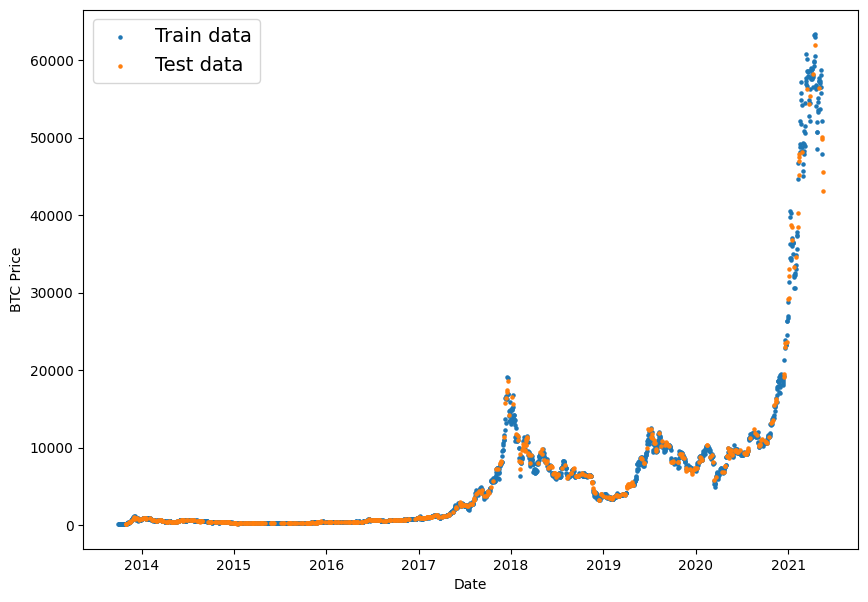

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Create train and test sets for time series (the right way)

In [14]:
# Create train and test splits the right way for the time series data
split_size = int(0.8 * len(prices)) # 80% train 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

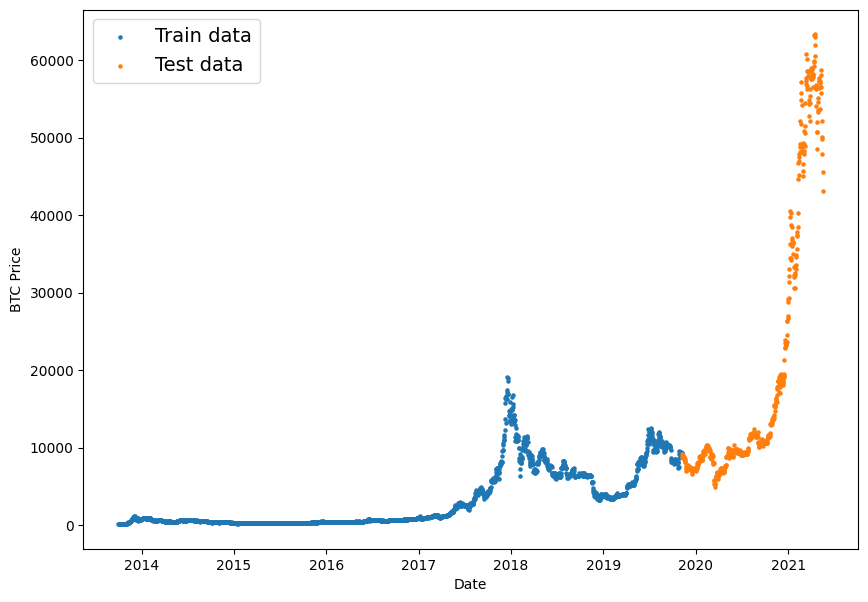

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Creating plotting function

Typing plotting code is tidious, let's functionize it.

In [16]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values: array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

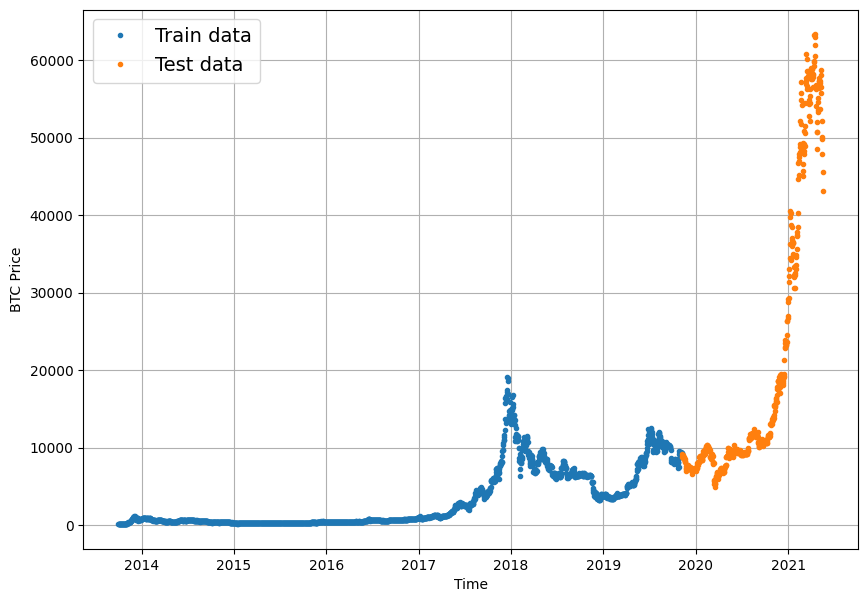

In [17]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

Wr've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict.
* **Window size** = number of timesteps we're going to use to predict **horizon**

Modelling experiments we are running:
0. Naive model (baseline)
1. Dense Model, horizon = 1, window = 7
2. Same as 1, horizon = 1, window = 30
3. Same as 1, horizon = 7, window = 30
4. Conv1D
5. LSTM
6. Same as 1 (but with multiveriate data)
7. N-BEATs Algorithm
8. Ensemble (multiple models optimized on different loss functions)
9. Future prediction model (model to predict future values)
10. Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

---
The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> the prediction at timestep 't' (y-hat) is equal to the value at timestep 't-1'(previous time step) - this is for horizon 1.


In [18]:
y_test[:10], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

In [19]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

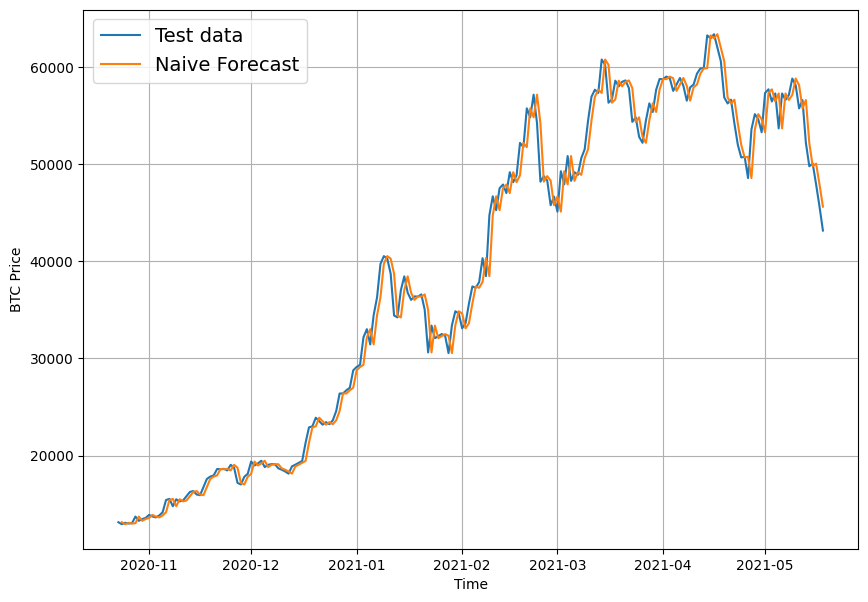

In [20]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

> 🛠 **Resource**: Read https://otexts.com/fpp3/simple-methods.html

## Evaluating a time series model

Let's look into some evaluation metrics for the time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better,** for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

> 📖**Resource**: For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice -> chapter 5.8](https://otexts.com/fpp3/accuracy.html)

In [21]:
import tensorflow as tf

In [22]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [23]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [24]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

That's one good looking evaluation function!

Let's now see if it works...

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [26]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [27]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
btc_price[:8]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033]

In [29]:
# What we want do with our bitcoin data:
print(f"We want to use this: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [30]:
# Let's split global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the predictions

In [31]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset

  E.g. if horizon = 1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:] # x[: 1:] here first ':' means -> take all the rows

```
Input to above function is of the form:
[[window_1],
 [window_2],
 [window_3]...  ]
```

In [32]:
# Test out the window labelling function:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

> To speed things up we'll leverage NumPy's array indexing.

📖 **Resource:** https://numpy.org/doc/stable/user/basics.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. `[0, 1, 2, 3, 4, 5, 6]`)
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [33]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turna a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(f"\nWindowed array:\n {windowed_array, windowed_array.shape}")

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [34]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [35]:
make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [37]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [38]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [39]:
prices[-1]

43144.4712908603

## Turning windows into training and test sets



In [40]:
# Make the train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of wondows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [41]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [42]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [43]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [44]:
# Check to see if train labelsare the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint using the following:

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [45]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense Model (Window = 7, horizon =1)

Our first deep model is going to be simple dense model:
* A single dense layer with 128 hidden units and ReLU activation
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function.
* Batch size of 128 (previously we've used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

* **Hyperparameters:** values a machine learning practitioner can adjust themselves.
* **Parameters:** values a model learns on its own.

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear') # linear activation is the same as having no activation
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1353.7644 - mae: 1353.7644 - mse: 6334257.0000   

18/18 [==============================] - 8s 51ms/step - loss: 1273.1904 - mae: 1273.1904 - mse: 5860362.0000 - val_loss: 2708.8936 - val_mae: 2708.8936 - val_mse: 16404808.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 324.8735 - mae: 324.8735 - mse: 422599.6562

18/18 [==============================] - 1s 33ms/step - loss: 321.6237 - mae: 321.6237 - mse: 415156.9375 - val_loss: 1316.1946 - val_mae: 1316.1946 - val_mse: 4457312.5000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 182.2573 - mae: 182.2573 - mse: 162113.2188

18/18 [==============================] - 1s 34ms/step - loss: 180.1613 - mae: 180.1613 - mse: 162045.9375 - val_loss: 1035.3036 - val_mae: 1035.3036 - val_mse: 3131427.0000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 163.5259 - mae: 163.5259 - mse: 143080.7188

18/18 [==============================] - 1s 34ms/step - loss: 161.7877 - mae: 161.7877 - mse: 140582.0938 - val_loss: 842.6605 - val_mae: 842.6605 - val_mse: 2429487.2500
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 152.7703 - mae: 152.7703 - mse: 127586.2812

18/18 [==============================] - 1s 33ms/step - loss: 151.0493 - mae: 151.0493 - mse: 124453.8984 - val_loss: 825.5786 - val_mae: 825.5786 - val_mse: 2275681.0000
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 147.7914 - mae: 147.7914 - mse: 112449.9688

18/18 [==============================] - 1s 34ms/step - loss: 148.6492 - mae: 148.6492 - mse: 118833.2109 - val_loss: 794.8209 - val_mae: 794.8209 - val_mse: 2165527.2500
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 147.5115 - mae: 147.5115 - mse: 117917.2500

18/18 [==============================] - 1s 32ms/step - loss: 143.7482 - mae: 143.7482 - mse: 111748.6797 - val_loss: 771.7465 - val_mae: 771.7465 - val_mse: 2038748.5000
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 137.2629 - mae: 137.2629 - mse: 105868.8203

18/18 [==============================] - 1s 33ms/step - loss: 137.3162 - mae: 137.3162 - mse: 105197.5547 - val_loss: 753.1619 - val_mae: 753.1619 - val_mse: 1953958.0000
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 137.1336 - mae: 137.1336 - mse: 104632.5938

18/18 [==============================] - 1s 48ms/step - loss: 137.1254 - mae: 137.1254 - mse: 104060.0391 - val_loss: 740.6052 - val_mae: 740.6052 - val_mse: 1832598.5000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 131.4086 - mae: 131.4086 - mse: 98992.6719 

18/18 [==============================] - 1s 33ms/step - loss: 131.9798 - mae: 131.9798 - mse: 98870.2031 - val_loss: 712.2227 - val_mae: 712.2227 - val_mse: 1739233.8750
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 127.9222 - mae: 127.9222 - mse: 93106.5234 - val_loss: 715.2275 - val_mae: 715.2275 - val_mse: 1695281.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9464 - mae: 126.9464 - mse: 91882.8359 - val_loss: 781.3921 - val_mae: 781.3921 - val_mse: 1847294.6250
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 130.6695 - mae: 130.6695 - mse: 93528.8672 - val_loss: 757.4984 - val_mae: 757.4984 - val_mse: 1765935.8750
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 120.9335 - mae: 120.9335 - mse: 82511.1172

18/18 [==============================] - 1s 43ms/step - loss: 124.2174 - mae: 124.2174 - mse: 87860.6797 - val_loss: 677.2508 - val_mae: 677.2508 - val_mse: 1538767.0000
Epoch 15/100
13/18 [====================>.........] - ETA: 0s - loss: 120.6579 - mae: 120.6579 - mse: 82542.1328

18/18 [==============================] - 1s 49ms/step - loss: 124.1240 - mae: 124.1240 - mse: 86736.6953 - val_loss: 660.0026 - val_mae: 660.0026 - val_mse: 1485346.6250
Epoch 16/100
18/18 [==============================] - 0s 8ms/step - loss: 119.7526 - mae: 119.7526 - mse: 82674.1953 - val_loss: 685.3305 - val_mae: 685.3305 - val_mse: 1534233.5000
Epoch 17/100
18/18 [==============================] - 0s 8ms/step - loss: 118.3238 - mae: 118.3238 - mse: 81395.4297 - val_loss: 660.5302 - val_mae: 660.5302 - val_mse: 1459474.3750
Epoch 18/100
 8/18 [============>.................] - ETA: 0s - loss: 129.5317 - mae: 129.5317 - mse: 93394.1328

18/18 [==============================] - 1s 51ms/step - loss: 118.6100 - mae: 118.6100 - mse: 81263.8984 - val_loss: 638.5782 - val_mae: 638.5782 - val_mse: 1425728.5000
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 120.0031 - mae: 120.0031 - mse: 82765.1406 - val_loss: 670.6505 - val_mae: 670.6505 - val_mse: 1472829.7500
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 117.6831 - mae: 117.6831 - mse: 80729.4844 

18/18 [==============================] - 1s 35ms/step - loss: 117.6438 - mae: 117.6438 - mse: 80152.8516 - val_loss: 629.9964 - val_mae: 629.9964 - val_mse: 1372446.1250
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 117.3681 - mae: 117.3681 - mse: 76932.8906

18/18 [==============================] - 1s 34ms/step - loss: 118.1564 - mae: 118.1564 - mse: 80704.8438 - val_loss: 621.9949 - val_mae: 621.9949 - val_mse: 1362874.5000
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0781 - mae: 117.0781 - mse: 80487.3906 

18/18 [==============================] - 1s 33ms/step - loss: 117.1387 - mae: 117.1387 - mse: 80499.1953 - val_loss: 617.4954 - val_mae: 617.4954 - val_mse: 1346491.8750
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3531 - mae: 116.3531 - mse: 79216.5391 - val_loss: 618.8452 - val_mae: 618.8452 - val_mse: 1332702.8750
Epoch 24/100
18/18 [==============================] - 0s 6ms/step - loss: 116.5993 - mae: 116.5993 - mse: 79435.9766 - val_loss: 622.1852 - val_mae: 622.1852 - val_mse: 1356309.8750
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 115.7321 - mae: 115.7321 - mse: 77627.1641

18/18 [==============================] - 1s 34ms/step - loss: 115.3734 - mae: 115.3734 - mse: 76973.4844 - val_loss: 607.8646 - val_mae: 607.8646 - val_mse: 1306762.6250
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0570 - mae: 115.0570 - mse: 76365.9375 - val_loss: 621.9937 - val_mae: 621.9937 - val_mse: 1349135.6250
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7607 - mae: 114.7607 - mse: 77527.2812 - val_loss: 608.0782 - val_mae: 608.0782 - val_mse: 1310554.8750
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 112.8966 - mae: 112.8966 - mse: 76008.6562

18/18 [==============================] - 1s 33ms/step - loss: 112.8966 - mae: 112.8966 - mse: 76008.6562 - val_loss: 601.1067 - val_mae: 601.1067 - val_mse: 1281655.5000
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2412 - mae: 112.2412 - mse: 75090.7656 - val_loss: 613.7039 - val_mae: 613.7039 - val_mse: 1297525.0000
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 117.5507 - mae: 117.5507 - mse: 78576.4375

18/18 [==============================] - 1s 32ms/step - loss: 116.8330 - mae: 116.8330 - mse: 77890.3984 - val_loss: 597.8459 - val_mae: 597.8459 - val_mse: 1276229.7500
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3793 - mae: 112.3793 - mse: 74037.2031 - val_loss: 626.2935 - val_mae: 626.2935 - val_mse: 1321267.7500
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6046 - mae: 113.6046 - mse: 77361.7734 - val_loss: 599.3466 - val_mae: 599.3466 - val_mse: 1277149.2500
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3760 - mae: 114.3760 - mse: 76231.2500 - val_loss: 618.2138 - val_mae: 618.2138 - val_mse: 1299891.1250
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8233 - mae: 111.8233 - mse: 74494.3203 - val_loss: 605.8564 - val_mae: 605.8564 - val_mse: 1287607.0000
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 111.2288 - mae: 111.2288 - mse: 

18/18 [==============================] - 1s 33ms/step - loss: 111.0890 - mae: 111.0890 - mse: 74556.4609 - val_loss: 597.7952 - val_mae: 597.7952 - val_mse: 1266345.8750
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 114.4993 - mae: 114.4993 - mse: 75474.6172 

18/18 [==============================] - 1s 33ms/step - loss: 114.3054 - mae: 114.3054 - mse: 74773.8594 - val_loss: 594.0808 - val_mae: 594.0808 - val_mse: 1246781.0000
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 113.4558 - mae: 113.4558 - mse: 75792.0078 

18/18 [==============================] - 1s 33ms/step - loss: 113.4558 - mae: 113.4558 - mse: 75792.0078 - val_loss: 586.4767 - val_mae: 586.4767 - val_mse: 1235436.5000
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7556 - mae: 113.7556 - mse: 74784.7188 - val_loss: 592.8842 - val_mae: 592.8842 - val_mse: 1249990.5000
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0100 - mae: 112.0100 - mse: 73002.3672 - val_loss: 593.7123 - val_mae: 593.7123 - val_mse: 1239600.2500
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4216 - mae: 111.4216 - mse: 72110.4297 - val_loss: 591.1698 - val_mae: 591.1698 - val_mse: 1242413.3750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5868 - mae: 111.5868 - mse: 73219.6328 - val_loss: 638.3464 - val_mae: 638.3464 - val_mse: 1349392.0000
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3441 - mae: 112.3441 - m

18/18 [==============================] - 1s 32ms/step - loss: 110.1014 - mae: 110.1014 - mse: 71769.0859 - val_loss: 584.1296 - val_mae: 584.1296 - val_mse: 1214478.3750
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2313 - mae: 113.2313 - mse: 74526.9922 - val_loss: 630.5974 - val_mae: 630.5974 - val_mse: 1312140.6250
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 108.8818 - mae: 108.8818 - mse: 74128.7266

18/18 [==============================] - 1s 48ms/step - loss: 110.0271 - mae: 110.0271 - mse: 73150.6484 - val_loss: 578.4737 - val_mae: 578.4737 - val_mse: 1206869.5000
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6461 - mae: 109.6461 - mse: 72624.9297 - val_loss: 621.5518 - val_mae: 621.5518 - val_mse: 1289396.8750
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1916 - mae: 116.1916 - mse: 75845.5156 - val_loss: 578.7536 - val_mae: 578.7536 - val_mse: 1204000.5000
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 109.7782 - mae: 109.7782 - mse: 72306.0625 - val_loss: 584.1674 - val_mae: 584.1674 - val_mse: 1209203.2500
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 112.8251 - mae: 112.8251 - mse: 75402.3203

18/18 [==============================] - 1s 34ms/step - loss: 112.8251 - mae: 112.8251 - mse: 75402.3203 - val_loss: 577.8781 - val_mae: 577.8781 - val_mse: 1202232.5000
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7133 - mae: 113.7133 - mse: 74682.9922 - val_loss: 601.8820 - val_mae: 601.8820 - val_mse: 1244555.6250
Epoch 54/100
17/18 [===========================>..] - ETA: 0s - loss: 112.0902 - mae: 112.0902 - mse: 73010.6719

18/18 [==============================] - 1s 47ms/step - loss: 112.2635 - mae: 112.2635 - mse: 72466.3984 - val_loss: 577.0657 - val_mae: 577.0657 - val_mse: 1200532.0000
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8810 - mae: 114.8810 - mse: 76186.6016 - val_loss: 578.3551 - val_mae: 578.3551 - val_mse: 1202617.7500
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 112.9492 - mae: 112.9492 - mse: 73987.8984 - val_loss: 723.0376 - val_mae: 723.0376 - val_mse: 1576232.2500
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 125.4956 - mae: 125.4956 - mse: 82535.0469 - val_loss: 687.3881 - val_mae: 687.3881 - val_mse: 1468749.3750
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 115.9535 - mae: 115.9535 - mse: 79402.5938

18/18 [==============================] - 1s 48ms/step - loss: 114.4419 - mae: 114.4419 - mse: 73463.4375 - val_loss: 575.6630 - val_mae: 575.6630 - val_mse: 1196079.3750
Epoch 59/100
18/18 [==============================] - 0s 9ms/step - loss: 108.6104 - mae: 108.6104 - mse: 71108.0781 - val_loss: 583.4158 - val_mae: 583.4158 - val_mse: 1210014.1250
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 109.0890 - mae: 109.0890 - mse: 72320.0703 - val_loss: 610.8108 - val_mae: 610.8108 - val_mse: 1260811.6250
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 108.8795 - mae: 108.8795 - mse: 72058.0312 - val_loss: 583.6714 - val_mae: 583.6714 - val_mse: 1203738.2500
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0757 - mae: 109.0757 - mse: 71075.5469 - val_loss: 605.1284 - val_mae: 605.1284 - val_mse: 1255576.0000
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3489 - mae: 110.3489 - m

18/18 [==============================] - 1s 34ms/step - loss: 108.8045 - mae: 108.8045 - mse: 70931.9062 - val_loss: 575.2364 - val_mae: 575.2364 - val_mse: 1185661.6250
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0585 - mae: 108.0585 - mse: 70398.3516 - val_loss: 645.8316 - val_mae: 645.8316 - val_mse: 1348177.7500
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 119.0520 - mae: 119.0520 - mse: 72530.1250 - val_loss: 731.0414 - val_mae: 731.0414 - val_mse: 1592822.5000
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 125.7239 - mae: 125.7239 - mse: 82082.4062 - val_loss: 620.3756 - val_mae: 620.3756 - val_mse: 1288379.1250
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 127.0179 - mae: 127.0179 - mse: 83523.1328 - val_loss: 591.5659 - val_mae: 591.5659 - val_mse: 1225382.0000
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9444 - mae: 111.9444 - m

18/18 [==============================] - 1s 33ms/step - loss: 107.9317 - mae: 107.9317 - mse: 70532.5781 - val_loss: 570.9850 - val_mae: 570.9850 - val_mse: 1178370.5000
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 108.0540 - mae: 108.0540 - mse: 70493.3672 

18/18 [==============================] - 1s 37ms/step - loss: 107.4418 - mae: 107.4418 - mse: 69749.0469 - val_loss: 570.6453 - val_mae: 570.6453 - val_mse: 1177043.8750
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8203 - mae: 110.8203 - mse: 72261.3594 - val_loss: 572.9913 - val_mae: 572.9913 - val_mse: 1179974.1250
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1222 - mae: 108.1222 - mse: 70873.2891 - val_loss: 577.9108 - val_mae: 577.9108 - val_mse: 1185851.8750
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7488 - mae: 108.7488 - mse: 70464.6797 - val_loss: 583.9958 - val_mae: 583.9958 - val_mse: 1195464.7500
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1747 - mae: 109.1747 - mse: 69994.2422 - val_loss: 573.1292 - val_mae: 573.1292 - val_mse: 1179880.6250
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 107.3203 - mae: 107.3203 - m

18/18 [==============================] - 1s 34ms/step - loss: 108.4446 - mae: 108.4446 - mse: 70623.8906 - val_loss: 568.7710 - val_mae: 568.7710 - val_mse: 1170518.1250
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 106.1355 - mae: 106.1355 - mse: 69051.4531 - val_loss: 576.2896 - val_mae: 576.2896 - val_mse: 1179734.7500
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6062 - mae: 114.6062 - mse: 75255.1016 - val_loss: 569.4019 - val_mae: 569.4019 - val_mse: 1170308.0000
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4879 - mae: 111.4879 - mse: 72817.3203 - val_loss: 632.3307 - val_mae: 632.3307 - val_mse: 1308108.8750
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4431 - mae: 113.4431 - mse: 71510.8359 - val_loss: 623.6752 - val_mae: 623.6752 - val_mse: 1291539.6250
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7567 - mae: 107.7567 - m

18/18 [==============================] - 1s 34ms/step - loss: 107.8749 - mae: 107.8749 - mse: 69145.8125 - val_loss: 567.4564 - val_mae: 567.4564 - val_mse: 1164246.5000
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1151 - mae: 107.1151 - mse: 69312.9531 - val_loss: 567.6262 - val_mae: 567.6262 - val_mse: 1164075.3750
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6526 - mae: 109.6526 - mse: 68835.1641 - val_loss: 617.9775 - val_mae: 617.9775 - val_mse: 1264577.3750


In [47]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 617.9774 - mae: 617.9774 - mse: 1264577.6250


[617.9774169921875, 617.9774169921875, 1264577.625]

In [48]:
# Load in saved best performing model_1 and evaluate it on the test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.4563 - mae: 567.4563 - mse: 1164245.8750


[567.456298828125, 567.456298828125, 1164245.875]

## Making forecast with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts beacuse actual forecasts are into the futur), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions.

In [49]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [50]:
# Make predictions using model_1 on the test dataset and view results.
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8838.572, 8775.573, 9043.886, 8787.098, 8731.423, 8750.256,
        8653.167, 8544.168, 8445.092, 8530.405], dtype=float32)>)

In [51]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

In [52]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

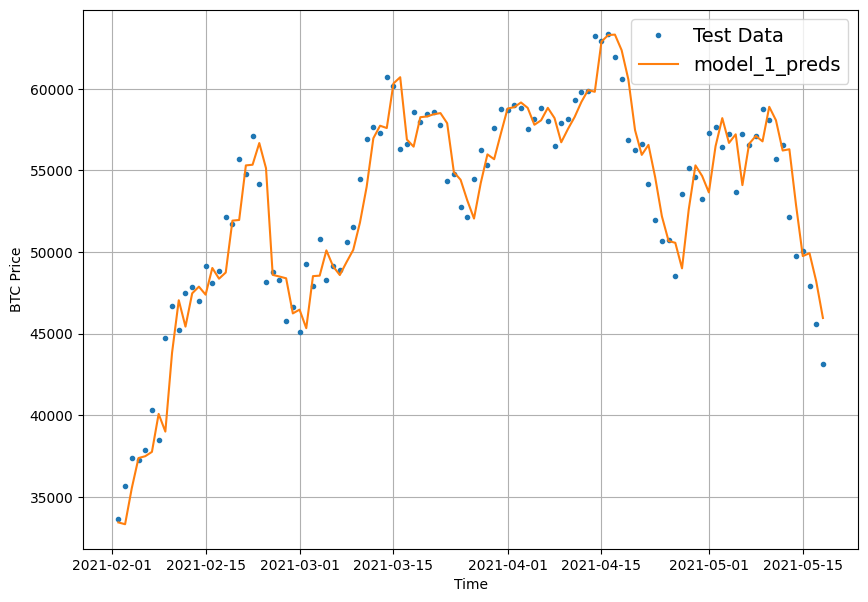

In [53]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="model_1_preds")

> checkout **autocorrelation in time series** to understand above plot better. (here as you can see all preds are slightly to the right of the true value).
https://otexts.com/fpp3/acf.html

## Model 2: Dense (Window=30, Horizon=1)

In [54]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin price)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [55]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [56]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [57]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [58]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [59]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 657.9304


657.930419921875

In [60]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 594.0968


594.0968017578125

In [61]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                                 input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [62]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 594.0968,
 'mse': 1227092.0,
 'rmse': 1107.7418,
 'mape': 2.6924276,
 'mase': 1.0384871}

In [63]:
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

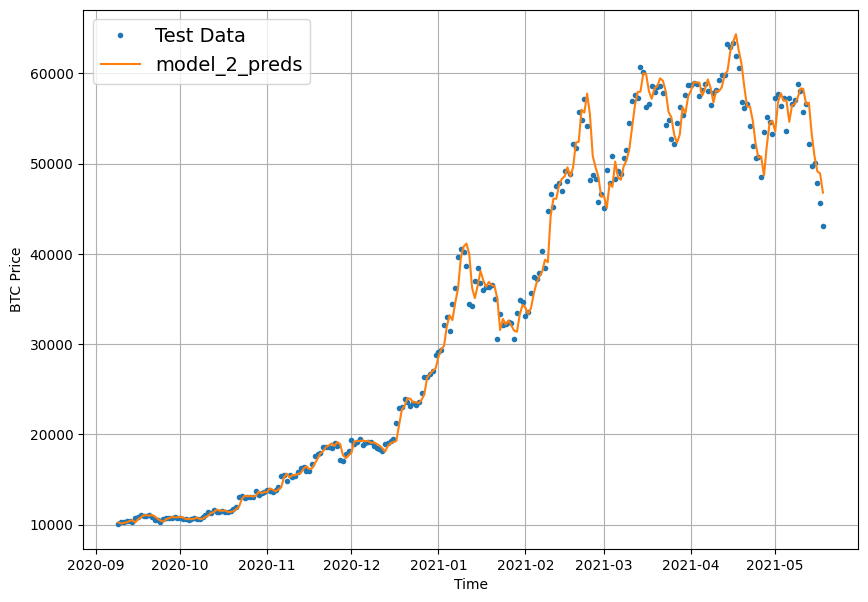

In [64]:
offset=300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label="model_2_preds")

## Model 3: Dense(window=30, horizon=7)

In [65]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [66]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [67]:
train_windows[:2], train_labels[:2]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333],
        [198.04883, 198.93233, 200.543  , 210.3075 , 225.02   , 248.25333,
         262.32666]]))

In [68]:
tf.random.set_seed(42)

# Create model (same as model 1 with different input and output sizes)
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name='model_3_dense')

# Compile the model
model_3.compile(loss='MAE',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [69]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1355.3008 - mae: 1355.3008 - mse: 5867320.5000


[1355.30078125, 1355.30078125, 5867320.5]

In [70]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1213.0632 - mae: 1213.0632 - mse: 5310626.0000


[1213.063232421875, 1213.063232421875, 5310626.0]

In [71]:
# Make predictions with model 3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:2], model_3_preds.shape

18/18 [==============================] - 0s 6ms/step


(<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
 array([[9294.813, 9241.61 , 9517.787, 9479.276, 9606.667, 9511.032,
         9353.617],
        [8922.066, 8963.776, 9113.748, 9214.357, 9432.754, 9376.109,
         8992.926]], dtype=float32)>,
 TensorShape([551, 7]))

In [72]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
# won't work because of shape conflict

## Make our evaluation function work for larger horizons

In [73]:
model_3_results['mae'].ndim, model_2_results['mae'].ndim

(1, 0)

In [74]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [75]:
# Get model_3 results aggregated to a single value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1213.0631,
 'mse': 5310626.0,
 'rmse': 1400.6333,
 'mape': 5.4594507,
 'mase': 2.158578}

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize

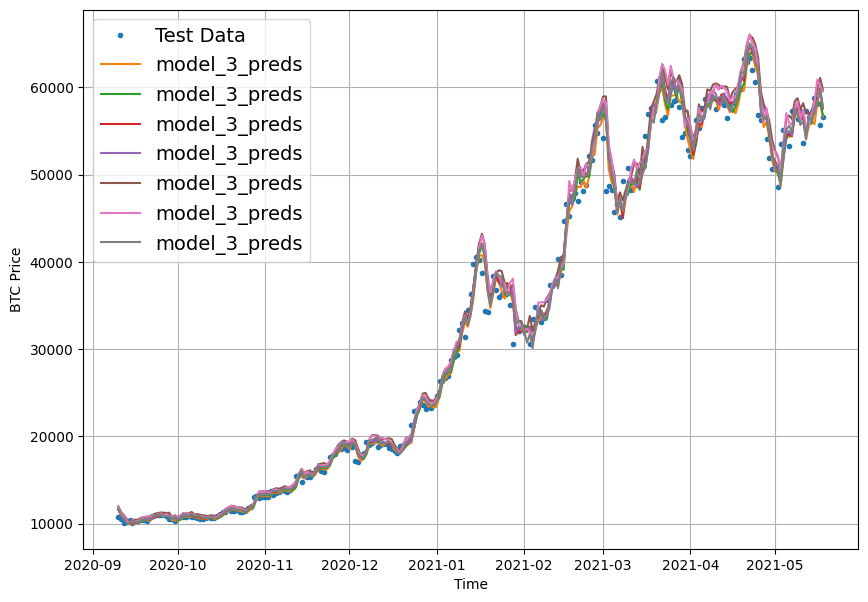

In [76]:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, format='-', label="model_3_preds")

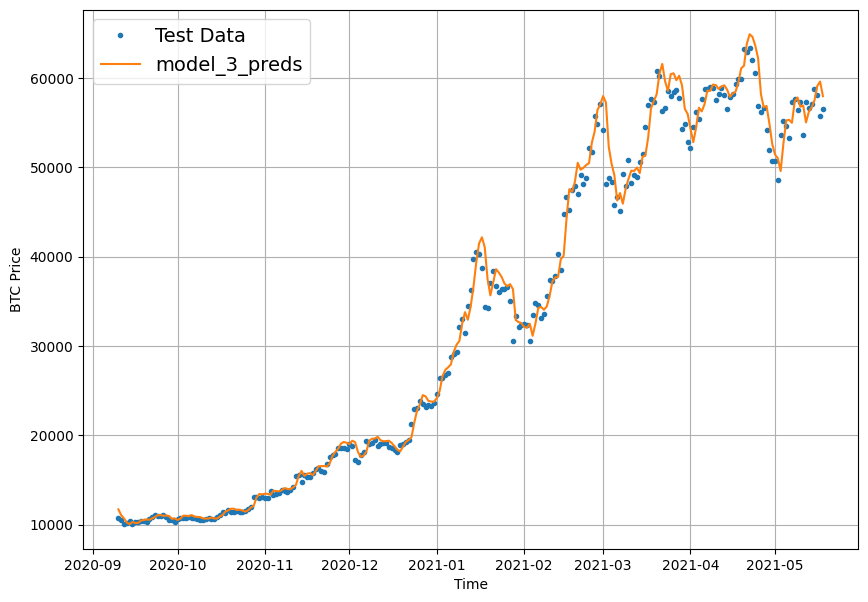

In [77]:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label="model_3_preds")

## Which of our models is performing best so far?

So we've trained a few models, now let's compare them and see how they've gone...

<Axes: >

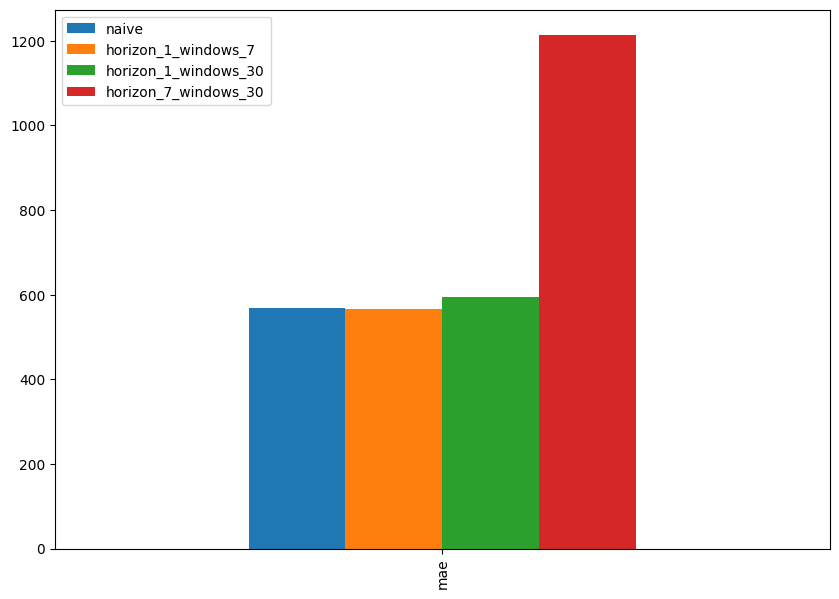

In [78]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_windows_7": model_1_results["mae"],
              "horizon_1_windows_30": model_2_results["mae"],
              "horizon_7_windows_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar")

> 🔑**Note:** You might be wondering why are the naive results so good? One of the reasons could be due to the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't alaways the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly), a naive model will often get fairly good results.


## Model 4: Conv1D

In [79]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [80]:
# Create the windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [81]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`...

However our data isn't in that shape yet...

In [82]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [83]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [84]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [85]:
# Test out our lambda layer
print(f"Orignal shape: {x.shape}") #(WINDOW_SIZE, )
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Orignal values with expanded shape:\n {expand_dims_layer(x)}")

Orignal shape: (7,)
Expanded shape: (7, 1)
Orignal values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [86]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [87]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 725.2948


725.2947998046875

In [89]:
# Load back in best performing model and re-evaluate
model_4 = tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.2571


566.2571411132812

In [90]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8883.168, 8792.325, 9014.105, 8786.164, 8742.769, 8739.096,
       8685.91 , 8538.358, 8460.688, 8526.559], dtype=float32)>

In [91]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 566.2572,
 'mse': 1171640.9,
 'rmse': 1082.4236,
 'mape': 2.5346975,
 'mase': 0.99475706}

In [92]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [93]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [94]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(train_windows,
            train_labels,
            verbose=0,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [95]:
# Evaluate the model
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 596.3400


596.3400268554688

In [96]:
# Load in best version of model_5 and evaluate in the test data
model_5 = tf.keras.models.load_model('/content/model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 589.9047


589.9046630859375

In [97]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8945.519, 8797.215, 8986.958, 8801.322, 8727.805], dtype=float32)>

In [98]:
# Evaluate the model_5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 589.9048,
 'mse': 1246945.6,
 'rmse': 1116.6671,
 'mape': 2.646697,
 'mase': 1.0362993}

In [99]:
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

>🔑**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series dataset

Before we add a feature to our timr series, what is a feature we can use?

One feature we could add is whether or not Daniel Brouke tweeted on that day ...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use

How about bitcoin halving events?

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving


In [100]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [101]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 Jan 2009 - this block reward isn't in our dataset (our data starts from 01 Oct 2013)
block_reward_2 = 25 # 28 Nov 2012
block_reward_3 = 12.5 # 9 Jul 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datatime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [102]:
block_reward_2_datatime

numpy.datetime64('2012-11-28')

In [103]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [104]:
# Add in a block_reward col
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [105]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [106]:
bitcoin_prices_block.iloc[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [107]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

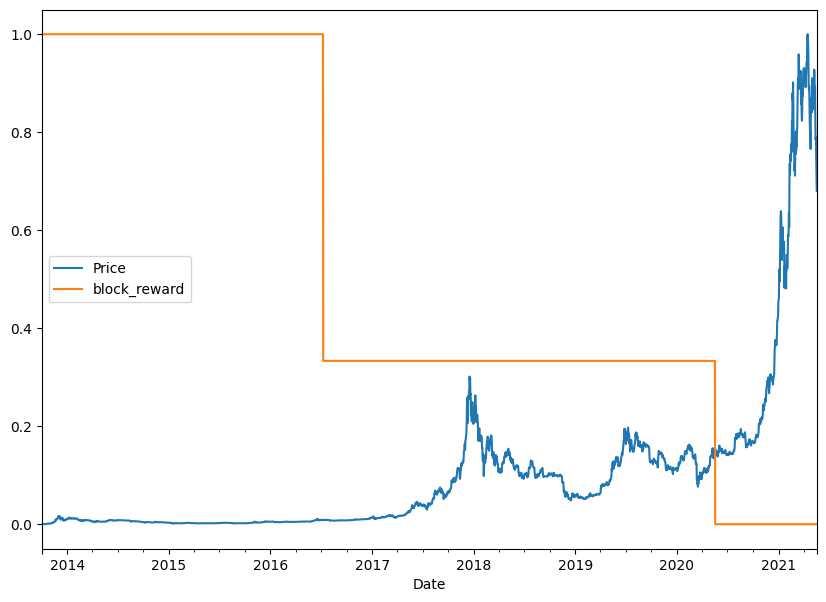

In [108]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

>In Python’s Pandas library, using two square brackets in front of a dataframe is used to select one or more columns of a dataframe as a new dataframe. This is because the double brackets return a dataframe object, while single brackets return a series object

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got the multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our mulltivariate data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html


In [109]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [110]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [111]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]

```

In [112]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [113]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [114]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [115]:
X_train, y_train, X_test, y_test

(            block_reward      Price+1      Price+2      Price+3      Price+4  \
 Date                                                                           
 2013-10-08          25.0   121.794998   120.655327   121.338661   118.674660   
 2013-10-09          25.0   123.032997   121.794998   120.655327   121.338661   
 2013-10-10          25.0   124.049004   123.032997   121.794998   120.655327   
 2013-10-11          25.0   125.961159   124.049004   123.032997   121.794998   
 2013-10-12          25.0   125.279663   125.961159   124.049004   123.032997   
 ...                  ...          ...          ...          ...          ...   
 2019-11-05          12.5  9202.415039  9290.896484  9197.632812  9131.410156   
 2019-11-06          12.5  9369.627930  9202.415039  9290.896484  9197.632812   
 2019-11-07          12.5  9326.599609  9369.627930  9202.415039  9290.896484   
 2019-11-08          12.5  9335.751953  9326.599609  9369.627930  9202.415039   
 2019-11-09          12.5  9

## Model 06: Dense (Multivariate time series)

In [116]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    # layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1266.6533 

18/18 [==============================] - 2s 39ms/step - loss: 1266.6533 - val_loss: 2078.2864
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 319.1138

18/18 [==============================] - 1s 31ms/step - loss: 320.1751 - val_loss: 1649.4072
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 192.5235

18/18 [==============================] - 1s 31ms/step - loss: 192.5235 - val_loss: 1147.5802
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 163.8332

18/18 [==============================] - 1s 31ms/step - loss: 163.8332 - val_loss: 911.1278
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 148.6210

18/18 [==============================] - 1s 30ms/step - loss: 155.7603 - val_loss: 841.7734
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 154.9651 - val_loss: 847.5292
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 147.5986 - val_loss: 856.6229
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 142.8753

18/18 [==============================] - 1s 30ms/step - loss: 142.6230 - val_loss: 782.4887
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 140.5295 - val_loss: 839.2078
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 153.3466

18/18 [==============================] - 1s 30ms/step - loss: 136.2621 - val_loss: 753.6968
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 130.3998

18/18 [==============================] - 1s 32ms/step - loss: 130.3998 - val_loss: 720.2994
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 127.4352 - val_loss: 743.7074
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0075 - val_loss: 728.5457
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 117.9574

18/18 [==============================] - 1s 33ms/step - loss: 121.4719 - val_loss: 692.2575
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 125.5332 - val_loss: 693.8342
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 121.1869 - val_loss: 733.3588
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7388 - val_loss: 716.5513
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 135.0485

18/18 [==============================] - 1s 30ms/step - loss: 116.9249 - val_loss: 654.7789
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4876 - val_loss: 683.0054
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7860

18/18 [==============================] - 1s 29ms/step - loss: 113.2683 - val_loss: 617.9039
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 116.3047 - val_loss: 633.7642
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 118.6338

18/18 [==============================] - 1s 50ms/step - loss: 110.8611 - val_loss: 606.5071
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 111.3474 - val_loss: 615.8596
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 113.5295

18/18 [==============================] - 1s 47ms/step - loss: 111.8005 - val_loss: 597.8682
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 110.2469

18/18 [==============================] - 1s 64ms/step - loss: 109.5898 - val_loss: 592.5963
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7413 - val_loss: 625.6741
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 159.5954

18/18 [==============================] - 1s 32ms/step - loss: 114.0534 - val_loss: 590.0806
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3986 - val_loss: 595.0670
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 109.0946

18/18 [==============================] - 1s 32ms/step - loss: 109.0946 - val_loss: 586.5306
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0466 - val_loss: 594.3672
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0521 - val_loss: 832.5278
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5956 - val_loss: 643.3174
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6944 - val_loss: 601.5679
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 129.2816

18/18 [==============================] - 1s 30ms/step - loss: 109.2731 - val_loss: 585.5814
Epoch 35/100
18/18 [==============================] - ETA: 0s - loss: 108.1332

18/18 [==============================] - 1s 32ms/step - loss: 108.1332 - val_loss: 582.4342
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2553 - val_loss: 601.7922
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1821 - val_loss: 608.5159
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 111.7225

18/18 [==============================] - 1s 30ms/step - loss: 108.6979 - val_loss: 577.4073
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8862 - val_loss: 594.4094
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 108.1495

18/18 [==============================] - 1s 32ms/step - loss: 107.4855 - val_loss: 576.8667
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6344 - val_loss: 621.0099
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2892 - val_loss: 585.8983
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0045 - val_loss: 626.4247
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0588 - val_loss: 599.8929
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 81.1393

18/18 [==============================] - 1s 30ms/step - loss: 107.4416 - val_loss: 576.4924
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2044 - val_loss: 577.5603
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5654 - val_loss: 655.0953
Epoch 48/100
13/18 [====================>.........] - ETA: 0s - loss: 108.4959

18/18 [==============================] - 1s 31ms/step - loss: 108.4475 - val_loss: 573.1843
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0635 - val_loss: 578.5016
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7645 - val_loss: 574.7873
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1898 - val_loss: 573.3447
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3697 - val_loss: 578.1555
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3226 - val_loss: 581.7505
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5642 - val_loss: 583.8448
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6692 - val_loss: 579.3953
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9563 - val_loss: 749.5082
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 12

18/18 [==============================] - 0s 29ms/step - loss: 107.8966 - val_loss: 572.2300
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 105.9587 - val_loss: 574.1668
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5948 - val_loss: 592.6403
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5161 - val_loss: 575.8237
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2531 - val_loss: 598.3110
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2830 - val_loss: 574.4685
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1058

18/18 [==============================] - 1s 30ms/step - loss: 107.1740 - val_loss: 570.6514
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 107.0797 - val_loss: 572.4235
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5253 - val_loss: 630.4177
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8219 - val_loss: 694.9587
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 120.7816 - val_loss: 596.7317
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 127.9545 - val_loss: 607.9928
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6944 - val_loss: 591.0615
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 107.7704

18/18 [==============================] - 1s 35ms/step - loss: 107.7704 - val_loss: 569.6023
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1792 - val_loss: 575.4396
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2933 - val_loss: 570.2053
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 106.3242 - val_loss: 574.3763
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 106.9947 - val_loss: 570.7078
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2131 - val_loss: 612.4304
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 106.6966 - val_loss: 570.4013
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 106.3948 - val_loss: 598.9911
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 106.9451 - val_loss: 580.8431
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 106.69

18/18 [==============================] - 1s 44ms/step - loss: 105.9251 - val_loss: 569.0551
Epoch 82/100
13/18 [====================>.........] - ETA: 0s - loss: 117.0560

18/18 [==============================] - 1s 40ms/step - loss: 113.9727 - val_loss: 567.9386
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3162 - val_loss: 614.8837
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7420 - val_loss: 585.8451
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1333 - val_loss: 569.1144
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7182 - val_loss: 586.3532
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0034 - val_loss: 589.1129
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3734 - val_loss: 567.9449
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 105.6505 - val_loss: 568.0895
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4945 - val_loss: 593.1971
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 1s 30ms/step - loss: 106.5015 - val_loss: 567.1362
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6569 - val_loss: 647.4752
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2827 - val_loss: 582.1790
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8362 - val_loss: 568.2934
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6800 - val_loss: 572.4654
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4208 - val_loss: 603.0165


In [117]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 603.0165


603.0164794921875

In [118]:
# Load in and evaluate best performing model
model_6 =tf.keras.models.load_model('/content/model_experiments/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.1362


567.1361694335938

In [119]:
# Make predictions with the multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8849.464, 8760.789, 9043.745, 8791.183, 8723.452, 8743.427,
       8687.336, 8507.107, 8455.978, 8528.909], dtype=float32)>

In [120]:
# Evaluate the predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.1361,
 'mse': 1164630.6,
 'rmse': 1079.1805,
 'mape': 2.534987,
 'mase': 0.99630105}

In [121]:
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

In [122]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Model 7:  N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it performs really well...) time series forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing N-BEATS block layer

Because the N-BEATS layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TendorFlow we can use subclassing;
https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

In [123]:
# Create NBeatsBlock custom layer:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument take care of all the arguments for the parent class (input_shape, trainable, name, etc)

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # Output of the block is a theta layer with linear activation (i.e, no activation)
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call (self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon: ]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do so we'll make some dummy inputs and outputs.

In [124]:
# Set up dummy NBeatsBlock layer to represnt inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast +forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [125]:
tf.range(WINDOW_SIZE)

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>

In [126]:
tf.range(WINDOW_SIZE)+1

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [127]:
# Create dummy inputs (have to be same size as the input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [128]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.8672824  -0.7487055   0.15078132 -0.5946567  -0.23142198 -0.6268887
  0.77095693]
Forecast: 0.3145004212856293


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide.

In [129]:
HORIZON = 1
WINDOW_SIZE = 7

In [130]:
# Create N-BEATS data inputs(N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [131]:
# Add windowed coloumns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [132]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [133]:
# Time to make our dataset performant using tf.data.API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18: https://arxiv.org/pdf/1905.10437v4.pdf

In [134]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (substract and add).

The N-BEATS algorithm uses double residual stacking to help train it's deeper architecture (section 3.2 of N-BEATS paper).

In [135]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Substract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compliling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stack of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards the best performance).
  📖**Resource:** https://medium.com/analytics-vidhya/learning-rate-decay-and-methods-in-deep-learning-2cee564f910b

In [136]:
%%time

tf.random.set_seed(42)

# 1. Setup the instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="Model_7_NBEATS")

# 8. Compile the model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 910: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1206: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1306: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 15s, sys: 6.98 s, total: 5min 22s
Wall time: 6min


In [137]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 568.5017


568.501708984375

In [138]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8819.765, 8782.939, 9059.275, 8756.703, 8764.41 , 8756.089,
       8660.011, 8504.333, 8481.868, 8529.141], dtype=float32)>

In [139]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 568.5017,
 'mse': 1159084.0,
 'rmse': 1076.6077,
 'mape': 2.5790381,
 'mase': 0.9987}

In [140]:
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

In [141]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Woah... even with all those special layers and hand-crafted network, it looks like the N-BEATS model dosen't perform as well as `model_1` or the orignal naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

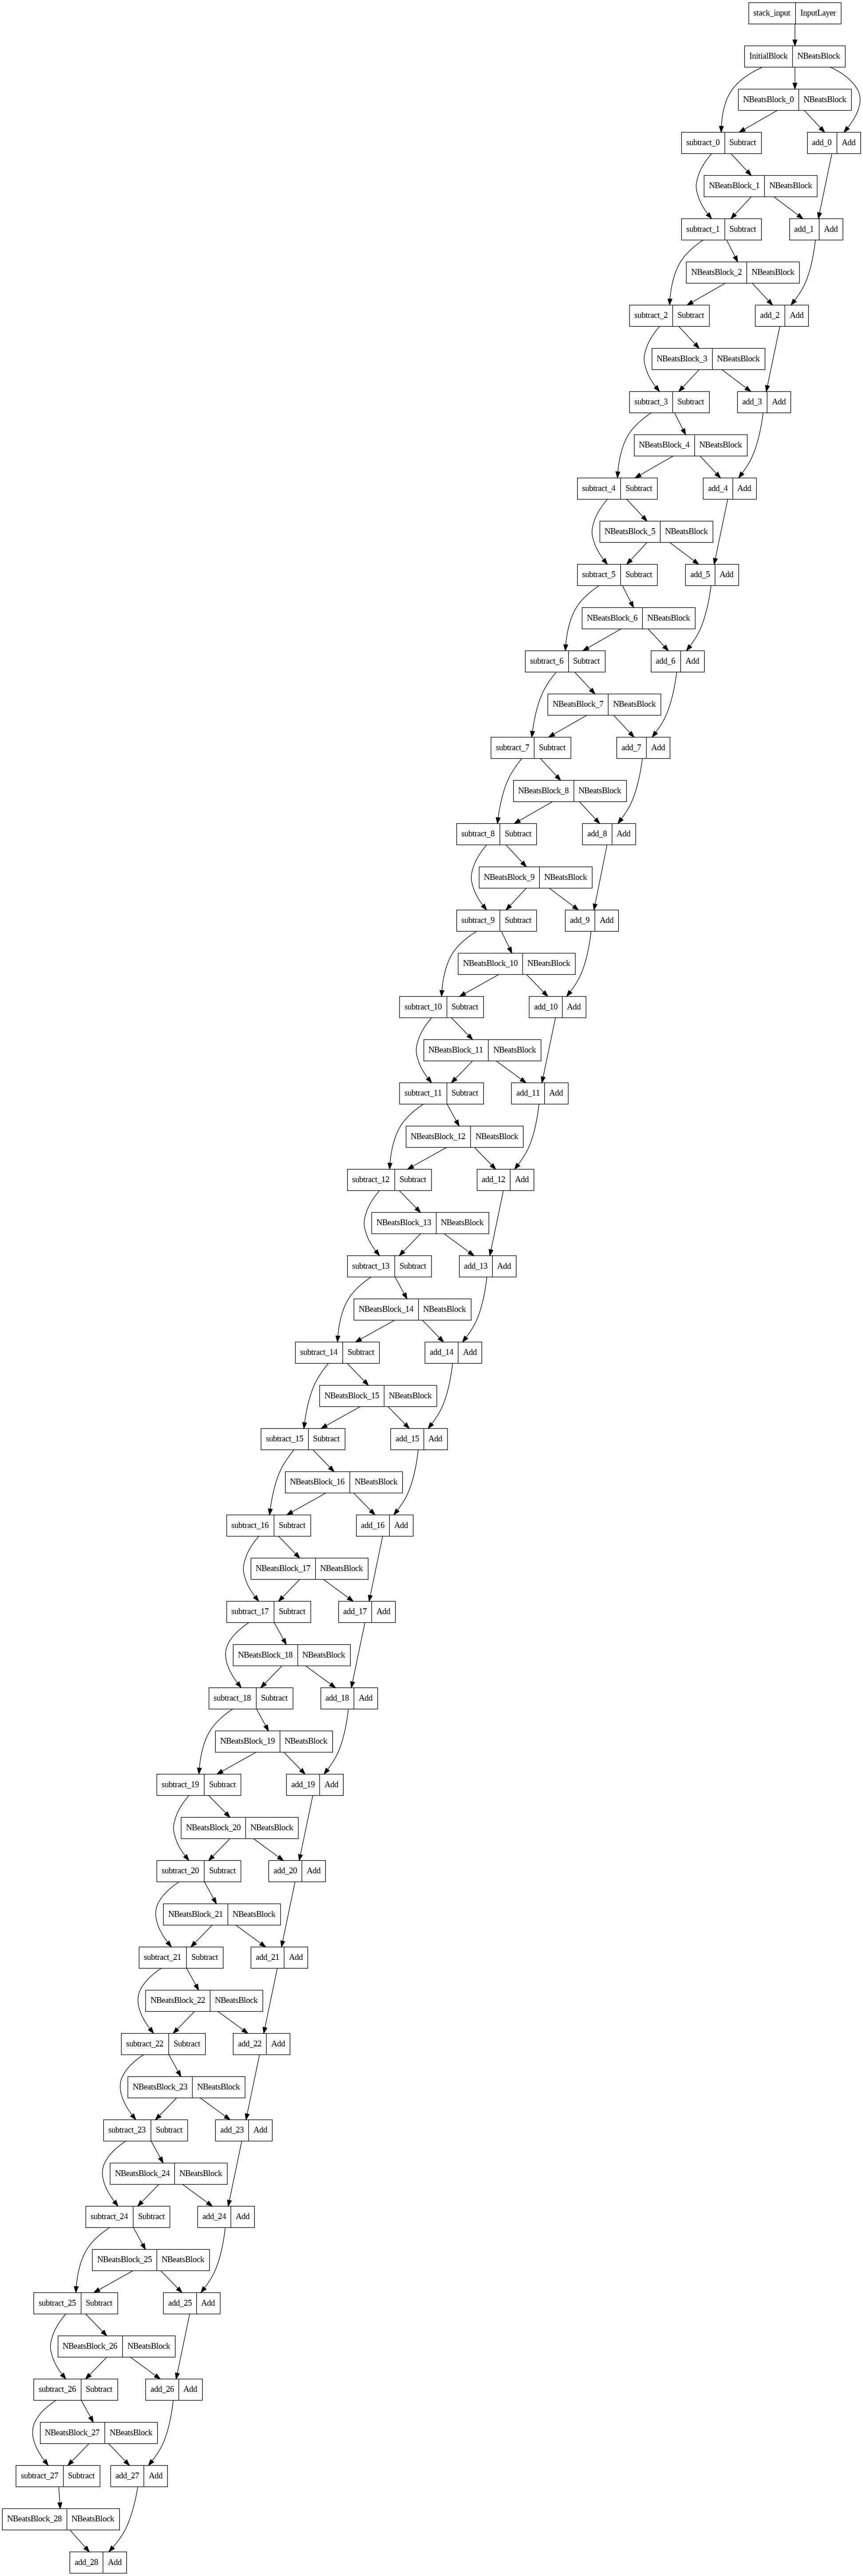

In [142]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble levrages the wisdom of the crowd effect.

It combines many *differernt* models to predict a common goal.

In [143]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensmeble of models (using different loss functions)

In [144]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  """
  Return a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae","mse","mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)
      ])

      # Compile simple_model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [145]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 924: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 251: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 452: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 552: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 698: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 798: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 372: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 472: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [146]:
len(ensemble_models)

15

In [147]:
ensemble_models

### Make predictions with our ensemble model

In [148]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [149]:
# Create a list of ensmeble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 49ms/step
CPU times: user 792 ms, sys: 28.9 ms, total: 821 ms
Wall time: 919 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8860.936,  8781.725,  9083.864, ..., 50025.164, 48958.168,
        46608.035],
       [ 8786.228,  8776.037,  9081.74 , ..., 50301.062, 48603.844,
        45980.363],
       [ 8782.31 ,  8726.3  ,  9025.722, ..., 49790.402, 48076.88 ,
        46237.05 ],
       ...,
       [ 8824.346,  8820.5  ,  8990.637, ..., 49808.26 , 48404.36 ,
        46171.35 ],
       [ 8826.735,  8743.425,  8990.035, ..., 49770.668, 48710.793,
        46425.223],
       [ 8773.853,  8770.55 ,  9068.424, ..., 50287.375, 48574.086,
        45983.473]], dtype=float32)>

In [150]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8860.936,  8781.725,  9083.864, ..., 50025.164, 48958.168,
        46608.035],
       [ 8786.228,  8776.037,  9081.74 , ..., 50301.062, 48603.844,
        45980.363],
       [ 8782.31 ,  8726.3  ,  9025.722, ..., 49790.402, 48076.88 ,
        46237.05 ],
       ...,
       [ 8824.346,  8820.5  ,  8990.637, ..., 49808.26 , 48404.36 ,
        46171.35 ],
       [ 8826.735,  8743.425,  8990.035, ..., 49770.668, 48710.793,
        46425.223],
       [ 8773.853,  8770.55 ,  9068.424, ..., 50287.375, 48574.086,
        45983.473]], dtype=float32)>

Our ensemble preds come out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [151]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8796.378, 8776.56 , 9066.287, 8715.565, 8743.092, 8744.923,
       8660.366, 8474.498, 8461.842, 8525.283], dtype=float32)>

In [152]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8788.597 , 8776.59  , 9068.424 , 8714.359 , 8731.642 , 8726.3545,
       8658.163 , 8479.822 , 8451.432 , 8523.493 ], dtype=float32)

In [153]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 569.45514,
 'mse': 1155148.5,
 'rmse': 1074.7783,
 'mape': 2.585552,
 'mase': 1.0003749}

In [154]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 569.4784,
 'mse': 1150990.2,
 'rmse': 1072.8422,
 'mape': 2.5898266,
 'mase': 1.0004158}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000 USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 USD to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation of by 1.96 (assuming distribution is Gaussian/Normal, 95% of observations falls within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [155]:
tf.math.reduce_std(ensemble_preds, axis=0)

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 31.077637,  34.181946,  48.195274,  25.141296,  40.555984,
        43.87267 ,  27.416256,  26.934301,  38.30471 ,  24.945095,
        19.836262,  28.330975,  29.903217,  40.15894 ,  57.804634,
        41.861893,  34.50732 ,  33.704315,  27.927956,  43.74552 ,
        23.65044 ,  36.06772 ,  31.659678,  32.89967 ,  25.26648 ,
        26.50694 ,  23.988382,  27.174377,  21.735071,  20.112888,
        19.680027,  21.233528,  22.74785 ,  18.438995,  22.455843,
        18.051872,  16.810902,  21.757437,  12.993763,  32.287476,
        71.45471 ,  42.43319 ,  69.786255,  61.26898 ,  31.461882,
        33.13285 ,  30.048275,  12.426385,  18.462322,  16.305468,
        16.52796 ,  16.051813,  18.776157,  21.669058,  17.600498,
        15.912667,  35.206093,  21.726202,  28.188177,  32.368275,
        29.02522 ,  31.706944,  39.902306,  34.29535 ,  24.96936 ,
        26.001837,  20.604681,  50.439827,  41.217796,  52.383034,
        34.030

In [156]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models

   # 2. Measure the standard deviation of the predictions
   std = tf.math.reduce_std(preds, axis=0)

   # 3. Multiply the standard deviation by 1.96
   interval = 1.96 * std

   # 4. Get the prediction interval upper and lower bounds
   preds_mean = tf.reduce_mean(preds, axis=0)
   lower, upper = preds_mean - interval, preds_mean + interval

   return lower, upper

In [157]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower[:10], upper[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8735.466 , 8709.5625, 8971.824 , 8666.288 , 8663.603 , 8658.933 ,
        8606.63  , 8421.707 , 8386.765 , 8476.391 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8857.29 , 8843.557, 9160.75 , 8764.843, 8822.581, 8830.913,
        8714.103, 8527.289, 8536.919, 8574.176], dtype=float32)>)

In [158]:
X_test.index[:10]

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

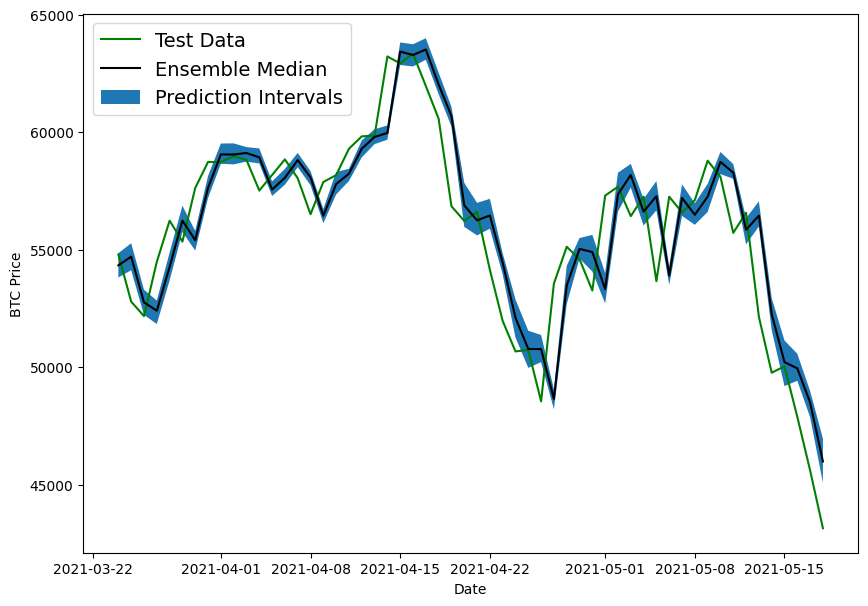

In [159]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions between)
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use matplot fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

Hmm...

So far all of our models predictions have been lagging behind the test data...

As in they're replicating what the naive model does and just predict the previous timestep as the next timestep.

> 🔑 **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning:
* **Aleatoric uncertainty** - This type of uncertainty cannot be reduced and it is often reffered as "data" uncertainty or "subway" uncertainty.
* **Epistemic uncertainty** - This type of uncertainty can be  reduced, it is also referred to as "model" or "coconut" uncertainty.

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!


In [160]:
HORIZON = 1
WINDOW_SIZE = 7

In [161]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [162]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [163]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [164]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [165]:
# Turn data into efficient running tensors
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE =  1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [166]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile the model
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [167]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:
1. Takes as input:
    * a list of values (Bitcoin historical data)
    * a trained model (such as `model_9`)
    * a window into the future to predict (our `INTO_FUTURE` variable)
    * the window size a model was trained on (`WINDOW_SIZE`) - the model can predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` time making a prediction on `WINDOW_SIZE`sequences which update to remove the first value and append the latest prediction.

In [168]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [169]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values end.

  Return future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-window_size:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(INTO_FUTURE):
    # predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [170]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 65ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55359.55078125

1/1 [==============================] - 0s 27ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55359.55078125] -> Prediction: 51610.53515625

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55359.55078125 51610.53515625] -> Prediction: 47950.98046875

1/1 [==============================] - 0s 26ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55359.55078125 51610.53515625 47950.98046875] -> Prediction: 48602.140625

1/1 [==============================] - 0s 21ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55359.55078125
 51610.53515625 47950.98046875 48602.140625  

### Plot future forecasts

In [171]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  dates = np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date
  return dates

In [172]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [173]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [174]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [175]:
# Insert last timestep/final price into next time steps and future forecasts so that the plot looks continuous
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55359.55 , 51610.535, 47950.98 , 48602.14 , 47717.895,
        45062.92 , 48289.31 , 54318.83 , 49651.402, 46918.613, 48428.453,
        47429.24 , 46391.27 , 50805.566], dtype=float32))

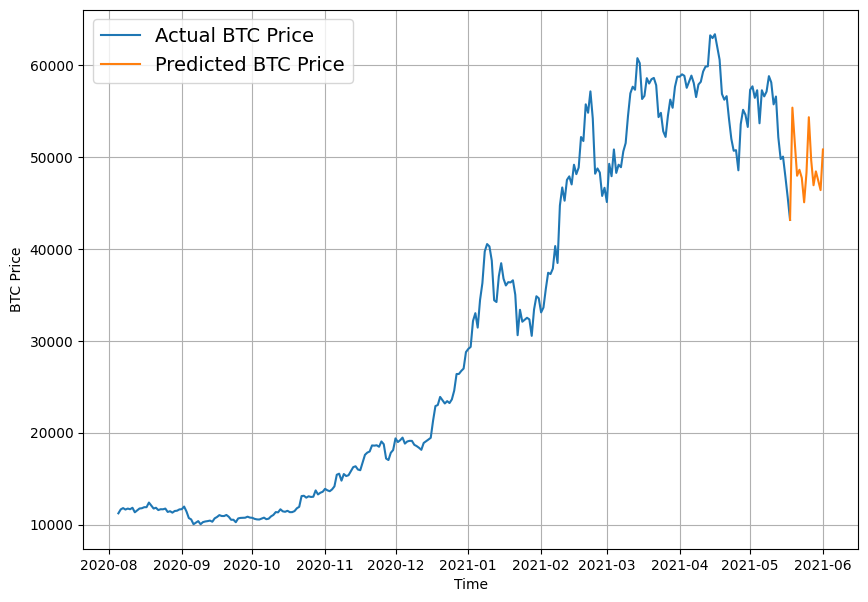

In [176]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem 🦃)

In [177]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [178]:
# Manufacture an extra price on the end (to showcase our turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [179]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

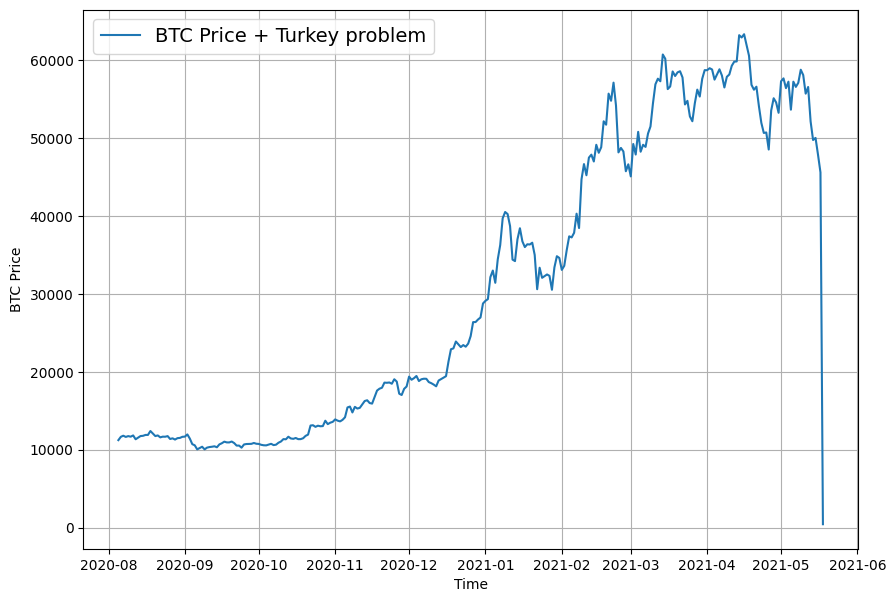

In [180]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500)

In [181]:
HORIZON = 1
WINDOW_SIZE = 7

In [182]:
# Create train and test sets for the turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [183]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [184]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [185]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 664.7816


664.7815551757812

In [186]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 643.1296


643.129638671875

In [187]:
# Make predictions with the turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8834.6045, 8776.945 , 8996.926 , 8729.273 , 8746.337 , 8725.425 ,
       8644.465 , 8509.628 , 8444.748 , 8503.61  ], dtype=float32)>

In [188]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17127.5,
 'mse': 614281700.0,
 'rmse': 23709.645,
 'mape': 121.320366,
 'mase': 26.504864}

In [189]:
model_1_results

{'mae': 567.4563,
 'mse': 1164245.8,
 'rmse': 1079.0022,
 'mape': 2.5231442,
 'mase': 0.99686354}

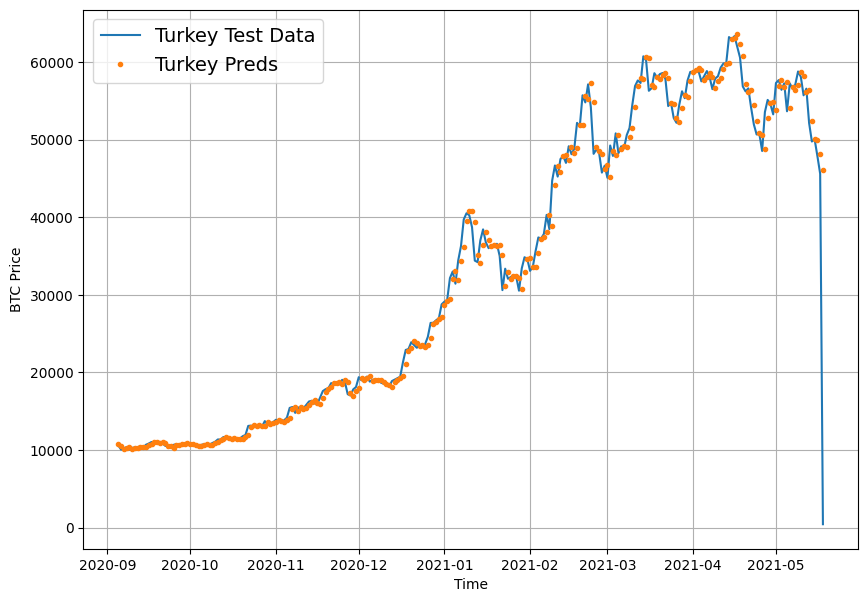

In [190]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

> 🔑 **Note:** Model cannot predict anything oustide of the distribution it was trained on.

## Compare models

In [191]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T

model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,567.456299,1.164246e+06,1079.002197,2.523144,0.996864
model_2_dense_w30_h1,594.096802,1.227092e+06,1107.741821,2.692428,1.038487
model_3_dense_w30_h7,1213.063110,5.310626e+06,1400.633301,5.459451,2.158578
model_4_CONV1D,566.257202,1.171641e+06,1082.423584,2.534698,0.994757
model_5_LSTM,589.904785,1.246946e+06,1116.667114,2.646697,1.036299
model_6_multivariate,567.136108,1.164631e+06,1079.180542,2.534987,0.996301
model_7_NBEATS,568.501709,1.159084e+06,1076.607666,2.579038,0.998700
model_8_ensemble,569.478394,1.150990e+06,1072.842163,2.589827,1.000416
model_10_turkey,17127.500000,6.142817e+08,23709.644531,121.320366,26.504864


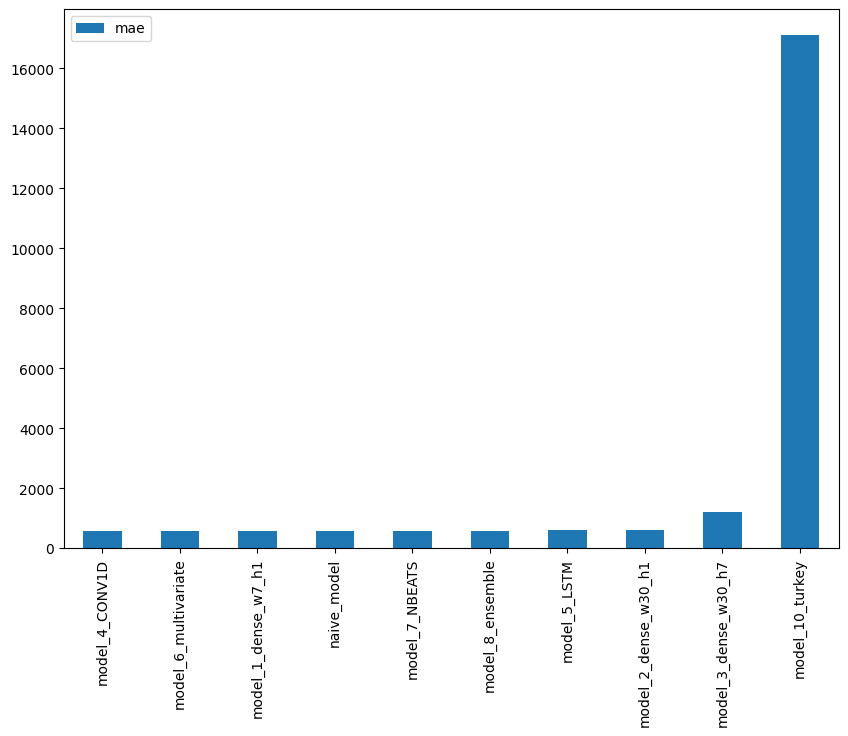

In [192]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");